# **Customer Purchasing Behavior Analysis**

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_df = pd.read_csv('/content/drive/MyDrive/DataScienceProject/BlackFriday.csv')
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## **Data Cleaning**

In [ ]:
sales_df.shape

(537577, 12)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
sales_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

The null data is quite a lot compared to non-null in two of the categories, so we impute rather than deleting

---

The available approaches are imputing the missing values with mean, mode or fill with 0. Since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.


In [ ]:
#Fill na with Zero
sales_df.fillna(0, inplace=True)

In [ ]:
sales_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [ ]:
sales_df.drop_duplicates()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,0.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,0.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,0.0,0.0,7172


## **Exploratory Data Analysis**

In [ ]:
# Number of unique customers
len(sales_df['User_ID'].unique())

5891

In [ ]:
# Number of unique products sold
len(sales_df['Product_ID'].unique())

3623

### **User Focused**

In [ ]:
sales_user_df = sales_df.drop(columns=['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'])

In [ ]:
sales_user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,8370
1,1000001,F,0-17,10,A,2,0,15200
2,1000001,F,0-17,10,A,2,0,1422
3,1000001,F,0-17,10,A,2,0,1057
4,1000002,M,55+,16,C,4+,0,7969


In [ ]:
sales_user_df['User_ID'].value_counts()

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
           ... 
1005608       6
1002111       6
1005810       6
1004991       6
1000708       5
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
total_purchase = sales_user_df.groupby(['User_ID'])['Purchase'].sum()

In [ ]:
sales_user_df = sales_user_df.drop(columns=['Purchase'])
sales_user_df = sales_user_df.drop_duplicates()

In [ ]:
total_purchase

User_ID
1000001     333481
1000002     810353
1000003     341635
1000004     205987
1000005     821001
            ...   
1006036    3821666
1006037    1075037
1006038      80859
1006039     554504
1006040    1562615
Name: Purchase, Length: 5891, dtype: int64

In [ ]:
type(total_purchase)

pandas.core.series.Series

In [ ]:
len(total_purchase.values)

5891

In [ ]:
sales_user_df['Total_Purchase'] = total_purchase.values

In [ ]:
sales_user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase
0,1000001,F,0-17,10,A,2,0,333481
4,1000002,M,55+,16,C,4+,0,810353
5,1000003,M,26-35,15,A,3,0,341635
6,1000004,M,46-50,7,B,2,1,205987
9,1000005,M,26-35,20,A,1,1,821001


#### **Utilities**

In [ ]:
# Pie chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%'.format(pct, v=val)
    return my_format

def show_pie_chart(count, labels):
  if labels==[]:
    labels=count.index
  sns.set(rc={'figure.figsize':(10,5)})
  plt.pie(count,labels = labels, autopct=autopct_format(count))
  plt.show()

In [ ]:
# Average Purchase
def central_tendencies(feature):
  median_gender_sales = sales_user_df.groupby(feature)['Total_Purchase'].median()
  mean_gender_sales = sales_user_df.groupby(feature)['Total_Purchase'].mean()

  my_colors = list('bcrgkym')  #red, green, blue, black, etc.

  median_gender_sales.plot(kind='bar', color=my_colors)
  plt.title("Median Purchase Based on "+ feature)

  print(median_gender_sales)
  print(mean_gender_sales)

#### **Exploratory Data Analysis**

M    4225
F    1666
Name: Gender, dtype: int64


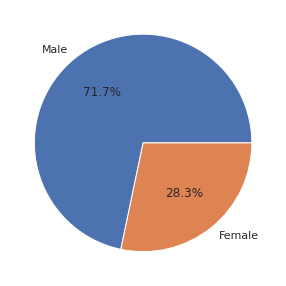

In [ ]:
# Purchase based on Gender of Users
gender_count = sales_user_df['Gender'].value_counts()
print(gender_count)

show_pie_chart(gender_count, ['Male', 'Female'])

Gender
F    538254.0
M    507795.0
Name: Total_Purchase, dtype: float64
Gender
F    876008.343938
M    842186.621775
Name: Total_Purchase, dtype: float64


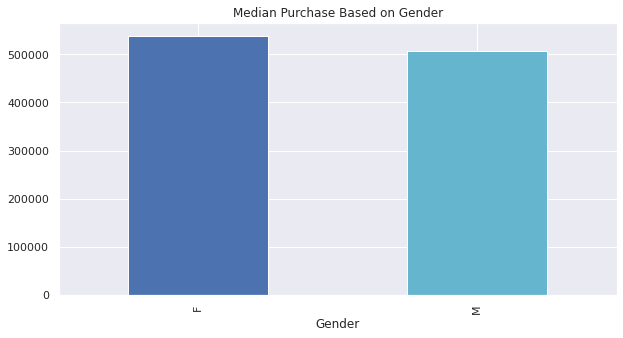

In [ ]:
# Average Male and Female Purchase Rate
central_tendencies('Gender')

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64


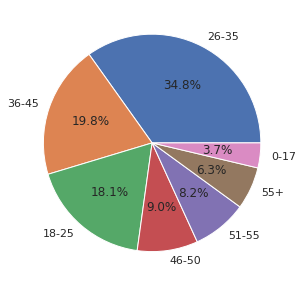

In [ ]:
# Based on Age
age_count = sales_user_df['Age'].value_counts()
print(age_count)

show_pie_chart(age_count,[])

Why is it on the higher side for 0-17 age groups? Who is buying?

Age
0-17     555754.5
18-25    509915.0
26-35    504267.0
36-45    512174.0
46-50    566637.0
51-55    523833.0
55+      503257.0
Name: Total_Purchase, dtype: float64
Age
0-17     919719.477064
18-25    844266.887746
26-35    851840.635168
36-45    845521.623822
46-50    875975.152542
51-55    833758.049896
55+      841170.005376
Name: Total_Purchase, dtype: float64


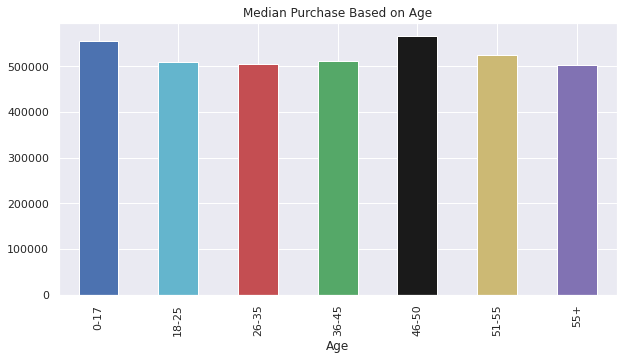

In [ ]:
central_tendencies('Age')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

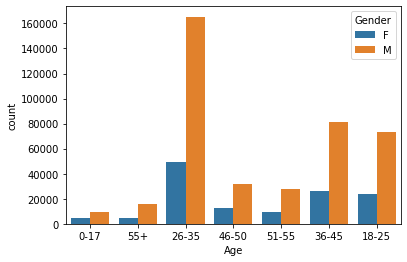

In [ ]:
# Gender and age
sns.countplot(sales_user_df['Age'],hue=sales_user_df['Gender'])

In [ ]:
# Combining Marital status and gender
sales_user_df['combined_G_M'] = sales_user_df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(sales_user_df['combined_G_M'].unique())

# What are the kids buying?

['F_0' 'M_0' 'M_1' 'F_1']


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

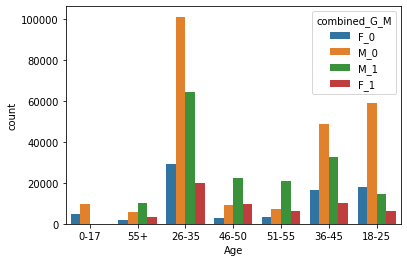

In [ ]:
sns.countplot(sales_user_df['Age'],hue=sales_user_df['combined_G_M'])

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64


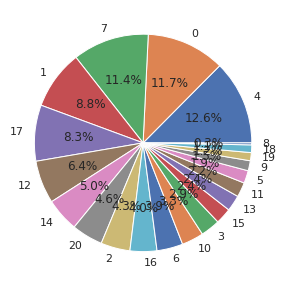

In [ ]:
# Based on Occupation

occ_count = sales_user_df['Occupation'].value_counts()
print(occ_count)

show_pie_chart(occ_count,[])

Occupation
0     484261.0
1     538859.0
2     492061.0
3     557160.0
4     539237.0
5     611043.0
6     488665.0
7     493669.0
8     271927.0
9     476338.5
10    538750.5
11    451336.5
12    502841.0
13    467742.0
14    535737.0
15    474815.0
16    557774.0
17    496419.0
18    622352.0
19    541740.0
20    540673.0
Name: Total_Purchase, dtype: float64
Occupation
0     868367.447674
1     885971.961315
2     785836.785156
3     904821.082353
4     869539.559459
5     918902.756757
6     775007.122807
7     860921.001495
8     652634.764706
9     778145.488636
10    872966.791667
11    821116.617188
12    860014.779255
13    757758.921429
14    845039.976190
15    825686.607143
16    774763.357447
17    830967.525458
18    993385.089552
19    981377.084507
20    868103.179487
Name: Total_Purchase, dtype: float64


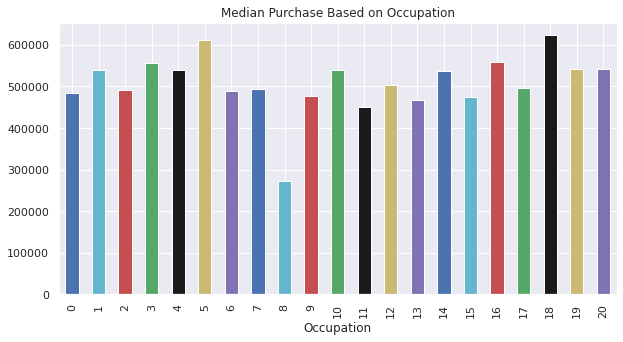

In [ ]:
central_tendencies('Occupation')

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64


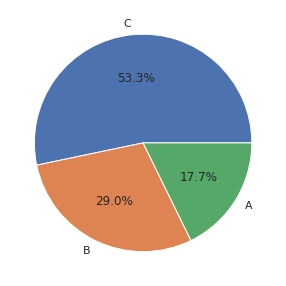

In [ ]:
# Based on City Category

city_cat_count = sales_user_df['City_Category'].value_counts()
print(city_cat_count)

show_pie_chart(city_cat_count,[])

City_Category
A    465897.0
B    523667.0
C    519162.0
Name: Total_Purchase, dtype: float64
City_Category
A    814994.066986
B    882462.007616
C    847287.967824
Name: Total_Purchase, dtype: float64


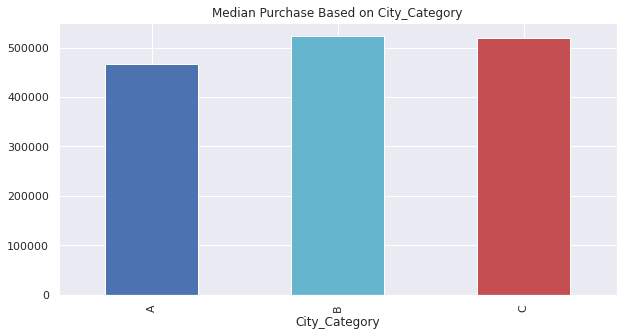

In [ ]:
central_tendencies('City_Category')

0    3417
1    2474
Name: Marital_Status, dtype: int64


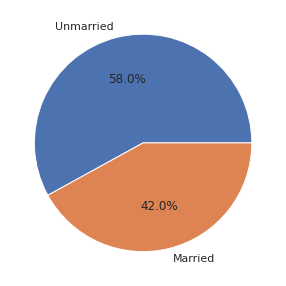

In [ ]:

# Based on Marital Status
mar_count = sales_user_df['Marital_Status'].value_counts()
print(mar_count)

show_pie_chart(mar_count,["Unmarried", "Married"])

### **Purchase Analysis**

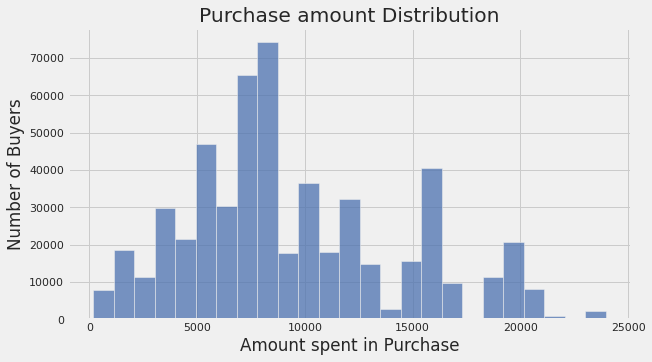

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,5))
sns.histplot(sales_df["Purchase"], bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")
plt.show()

In [ ]:
# Product category and purchases


## **Clustering**

In [ ]:
# iloc[:,[3,4]] locates the third and fourth "column"
# iloc[[3,4]] locates the third and fourth "row"

X = sales_df.iloc[:,[-1]].values

Choosing the number of clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# finding WCSS value for different number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    #kmeans.inertia_ helps in determining the wcss value
    #the obtained value is appended to the list
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

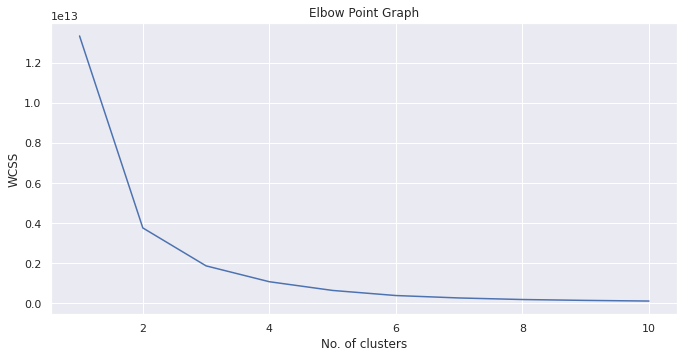

In [ ]:
# plot an elbow graph to find which clusers has minimum value

sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

The optimal number of clusters is 3 from the elbow point graph as there is no significant drop after 3

### **Training**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 0 ... 2 2 2]


Clusters --> 0, 1, 2

## **Data Preprocessing**

In [ ]:
sales_df = pd.read_csv('/content/drive/MyDrive/DataScienceProject/BlackFriday.csv')


In [ ]:
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


The ‘+’ value in ‘Age’ and ‘Stay_In_Current_City_Years’ needs to be fixed 

In [ ]:
sales_df['Age'] = sales_df['Age'].apply(lambda x:str(x).replace('55+', '55'))
sales_df['Stay_In_Current_City_Years'] = sales_df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))
sales_df['Stay_In_Current_City_Years'] = sales_df['Stay_In_Current_City_Years'].astype('int')
sales_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


The features ‘User_ID’ and ‘Product_ID’ are irrelevant and these features need to be dropped.

In [ ]:
sales_df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [ ]:
sales_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55,16,C,4,0,8,NaN,NaN,7969


‘Age’, ‘Gender’, and ‘City_Category’ are the discrete object features in our dataset which need to be encoded for further use. This can be done using the Label Encoder from sklearn’s preprocessing library.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
sales_df['Gender'] = label_encoder_gender.fit_transform(sales_df['Gender'])

label_encoder_age = LabelEncoder() 
sales_df['Age'] = label_encoder_age.fit_transform(sales_df['Age'])
label_encoder_city = LabelEncoder()
sales_df['City_Category'] = label_encoder_city.fit_transform(sales_df['City_Category'])

In [ ]:
sales_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,2,4,0,8,NaN,NaN,7969


The dataset is then split into X which contains all the independent features and Y which contains the dependent feature ‘Purchase’.

<AxesSubplot:>

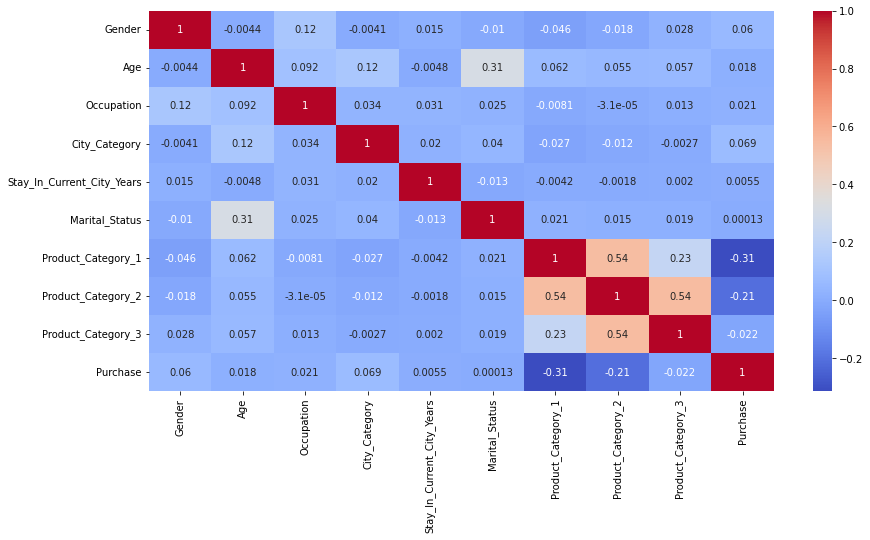

In [ ]:
corr = sales_df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
X = sales_df.drop("Purchase", axis = 1)
Y = sales_df["Purchase"]

We can deal with the curse of multicollinearity by performing Feature Selection. The feature importances can be easily found by using the ExtraTreesRegressor.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor 
selector = ExtraTreesRegressor()
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.67
1 3.2
2 7.0
3 0.92
4 3.7
5 0.93
6 68.09
7 4.8
8 10.68


It tells us that ‘Gender’, ‘City_Category’, and ‘Marital_Status’ are the least significant features in the dataset which are dropped.

In [ ]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

For effective model building, we can standardize the dataset using Feature Scaling. This can be done with StandardScaler() from sklearn’s preprocessing library.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

The dataset is split into training data and testing data in the ratio 80:20 using the train_test_split() command.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (430061, 9)
X_test shape: (107516, 9)
Y_train shape: (430061,)
Y_test shape: (107516,)


## Data Modeling

In [ ]:
from xgboost import XGBRegressor 
xgb = XGBRegressor(random_state = 42)

xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
Y_pred_xgb

array([13522.113, 14226.123,  6767.205, ...,  6751.595, 15984.139,
        6917.372], dtype=float32)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("XGB regression:")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression:
RMSE: 2889.2903392277076
R2 score: 0.6638430162786082


In [ ]:
X_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
287383,0.571057,-0.365786,1.366820,1.263032,0.884260,-0.831545,-1.145266,-0.770316,1.775982
130087,0.571057,-0.365786,0.906988,-1.369841,0.884260,-0.831545,-1.145266,1.483527,-0.617906
104368,0.571057,1.112868,-1.238898,-1.369841,-0.666336,1.202581,0.721053,-1.092294,-0.617906
370791,-1.751138,-0.365786,-0.625788,1.263032,-0.666336,-0.831545,0.721053,1.483527,-0.617906
121991,-1.751138,-0.365786,-1.238898,-0.053404,0.884260,-0.831545,-0.078798,1.161549,-0.617906
...,...,...,...,...,...,...,...,...,...
381923,0.571057,-1.105112,1.826653,-1.369841,-0.666336,1.202581,0.721053,1.161549,-0.617906
261392,0.571057,-0.365786,1.366820,-0.053404,0.108962,-0.831545,3.387224,-1.092294,-0.617906
327981,0.571057,-0.365786,-0.625788,-1.369841,-1.441634,1.202581,-0.078798,0.195616,-0.617906
478701,0.571057,-0.365786,-1.238898,-0.053404,1.659557,-0.831545,0.187819,0.195616,-0.617906


In [ ]:
Y_pred_xgb = xgb.predict(X_test)
Y_pred_xgb

array([13522.113, 14226.123,  6767.205, ...,  6751.595, 15984.139,
        6917.372], dtype=float32)